# Introduction
This script contains code to which clusters binary data using latent classes and gibbs sampling. The Top Level Function is used to run the who algorithm by giving it the data and number of clusters.

The algorithm is covered in depth on our [overleaf page](https://www.overleaf.com/project/61522e67e4b396f6dec80918)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
from scipy.stats import mode
import time
import sys
from BLCC import MixtureModelBernoulli

# Analysis of NPI data

In [2]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/smturro2/URES-Project-2/master/Data/NSI/narcissistic_personality_inventory.csv",index_col=0)
print(df.shape)
display(df.head())

(11243, 40)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40
1,0,0,0,1,0,0,0,0,1,1,...,1,1,1,1,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,1,1
4,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,0
5,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## tSNE Plot Pre-Clustering

<AxesSubplot:xlabel='x', ylabel='y'>

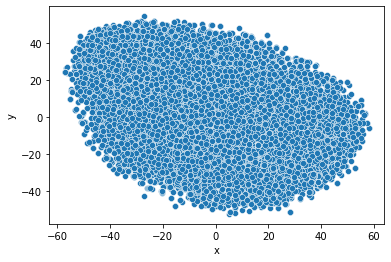

In [3]:
# Get projected data
df_proj = TSNE(perplexity=40,
               random_state=294,
               metric="hamming",
               square_distances=True).fit_transform(df)
df_proj = pd.DataFrame(df_proj,columns=["x","y"])

# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj)

## Run model

In [4]:
# Function to convert seconds to string
def convert_time_to_string(secs):
    mins = secs//60
    secs = secs % 60
    if mins == 0:
        return f"{secs:.3f} secs"
    else:
        return f"{mins} min {secs:.3f} secs"

In [5]:
num_classes = 8
random_state = 100
max_iter = 300
burn_in = 100

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
model = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=burn_in,
                               max_iter=max_iter)


# fit the data to the model
print(f"\nRunning {max_iter} iterations...",end="")
start_time = time.time()
model.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {convert_time_to_string(total_time)} (secs)")

# Get parameter estimates
theta, pi, k = model.get_params()

Data Size
---------
Samples: 11243
Features: 40

Running 300 iterations...DONE!
Total time: 8.0 min 26.119 secs (secs)


## Print Parameters

### Pi

In [6]:
pi = pd.DataFrame(pi)
pi.columns = ["Probability"]
pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
display(pi)

,Probability
Cluster 0,0.253064
Cluster 1,0.109186
Cluster 2,0.103273
Cluster 3,0.089605
Cluster 4,0.102369
Cluster 5,0.120228
Cluster 6,0.066088
Cluster 7,0.152854


### Theta

In [7]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 31,Item 32,Item 33,Item 34,Item 35,Item 36,Item 37,Item 38,Item 39,Item 40
Cluster 0,0.351463,0.044070,0.049437,0.015732,0.163900,0.098556,0.051717,0.272929,0.131274,0.216852,...,0.148303,0.042421,0.126481,0.096608,0.029213,0.005600,0.119023,0.014971,0.118827,0.080854
Cluster 1,0.337755,0.214607,0.119250,0.121209,0.475737,0.411061,0.129771,0.643309,0.617249,0.200094,...,0.432761,0.198300,0.335016,0.229681,0.207423,0.017676,0.304557,0.111330,0.523718,0.501937
Cluster 2,0.771805,0.241740,0.176287,0.144395,0.342660,0.326525,0.787840,0.610886,0.420498,0.638023,...,0.285581,0.328651,0.602469,0.202384,0.139782,0.160535,0.396221,0.096566,0.279539,0.398098
Cluster 3,0.869645,0.351543,0.242569,0.315631,0.796192,0.706968,0.372772,0.836673,0.775650,0.878034,...,0.718662,0.706773,0.858023,0.574612,0.620015,0.552436,0.394523,0.139970,0.780962,0.760586
Cluster 4,0.473725,0.148494,0.141132,0.102595,0.225281,0.231964,0.223440,0.481904,0.404647,0.265985,...,0.342211,0.063298,0.154127,0.294183,0.105265,0.021999,0.294152,0.149878,0.191012,0.327671
Cluster 5,0.775156,0.390275,0.311169,0.379529,0.596747,0.560986,0.621282,0.813709,0.777686,0.675391,...,0.642398,0.427456,0.621281,0.585122,0.486640,0.267827,0.497554,0.381296,0.524541,0.756110
Cluster 6,0.954803,0.702249,0.546974,0.758037,0.921505,0.934781,0.874395,0.938243,0.932563,0.954956,...,0.896406,0.922723,0.942344,0.811173,0.866753,0.844146,0.704409,0.672974,0.906383,0.938939
Cluster 7,0.776758,0.070244,0.096616,0.063937,0.430061,0.307123,0.039625,0.605244,0.304937,0.767541,...,0.387087,0.334578,0.556272,0.311000,0.234436,0.179056,0.167041,0.020135,0.359547,0.287718


### K

In [8]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,3
Subject 2,0
Subject 3,3
Subject 4,6
Subject 5,0
...,...
Subject 11239,0
Subject 11240,4
Subject 11241,4
Subject 11242,7


### Class Membership

In [9]:
memebership = model.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
Subject 1,1.946257e-08,1.634715e-02,2.229496e-03,8.163200e-01,1.243469e-05,1.438068e-02,3.617459e-08,1.507102e-01
Subject 2,5.343339e-01,4.934799e-03,3.059145e-05,1.938625e-11,4.594561e-01,1.040779e-07,8.370880e-25,1.244543e-03
Subject 3,2.407876e-21,9.384228e-09,4.379058e-07,9.550530e-01,1.134637e-14,3.401641e-04,4.460638e-02,2.855540e-09
Subject 4,6.449708e-24,1.147315e-10,6.113398e-08,1.650814e-01,7.930002e-16,1.833561e-04,8.347352e-01,4.804641e-11
Subject 5,9.012814e-01,1.893310e-04,1.313806e-04,1.416268e-09,1.233486e-03,2.102376e-09,8.586724e-25,9.716442e-02
...,...,...,...,...,...,...,...,...
Subject 11239,9.998219e-01,7.786232e-06,1.212857e-06,1.334399e-14,6.626869e-05,3.852573e-13,9.631788e-32,1.027838e-04
Subject 11240,1.897882e-04,1.138892e-04,4.813148e-04,1.309462e-10,9.990556e-01,5.650856e-05,3.315535e-20,1.028955e-04
Subject 11241,1.952478e-01,1.640226e-03,1.576848e-04,4.614179e-11,8.003613e-01,3.932350e-07,4.693954e-24,2.592528e-03
Subject 11242,9.596283e-04,1.294111e-02,2.703885e-03,2.224377e-05,3.226958e-01,2.129324e-03,6.241207e-16,6.585480e-01


## tSNE Plot Post Clustering

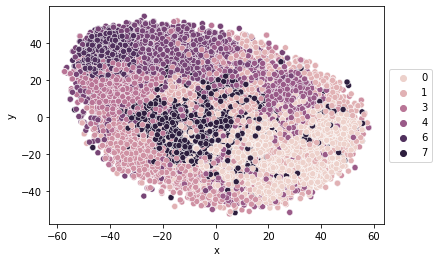

In [10]:
# Get projected data
df_proj["label"] = k.round().astype(np.int64).values
# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj,
                hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Parameter Samples

### Theta

(300, 8, 40)


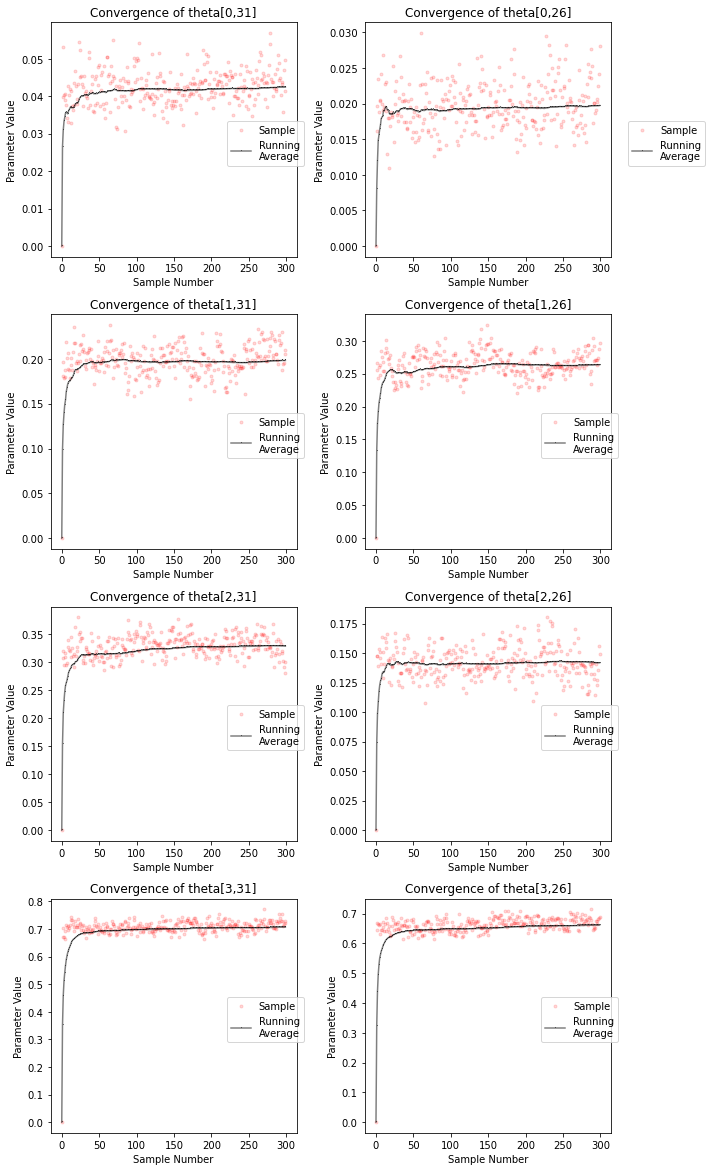

In [52]:
np.random.RandomState(100)
number_of_rows = 5
number_of_cols = 2
samples_theta_params = model.samples_theta_params
print(samples_theta_params.shape)

# Get random indexes
c_range = [0,1,2,3]
j_range = np.random.choice(np.arange(0,samples_theta_params.shape[2]),number_of_cols)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    for j in j_range:
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(0,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample+1, c, j])

        plt.subplot(number_of_rows,number_of_cols,num_plot)
        # Plot samples
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.15)
        # Plot running avg
        plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
        
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

In [67]:
mode(samples_class_assignments[:num_sample+1, i])[0][0].astype(int)

5

### k

(300, 11243)


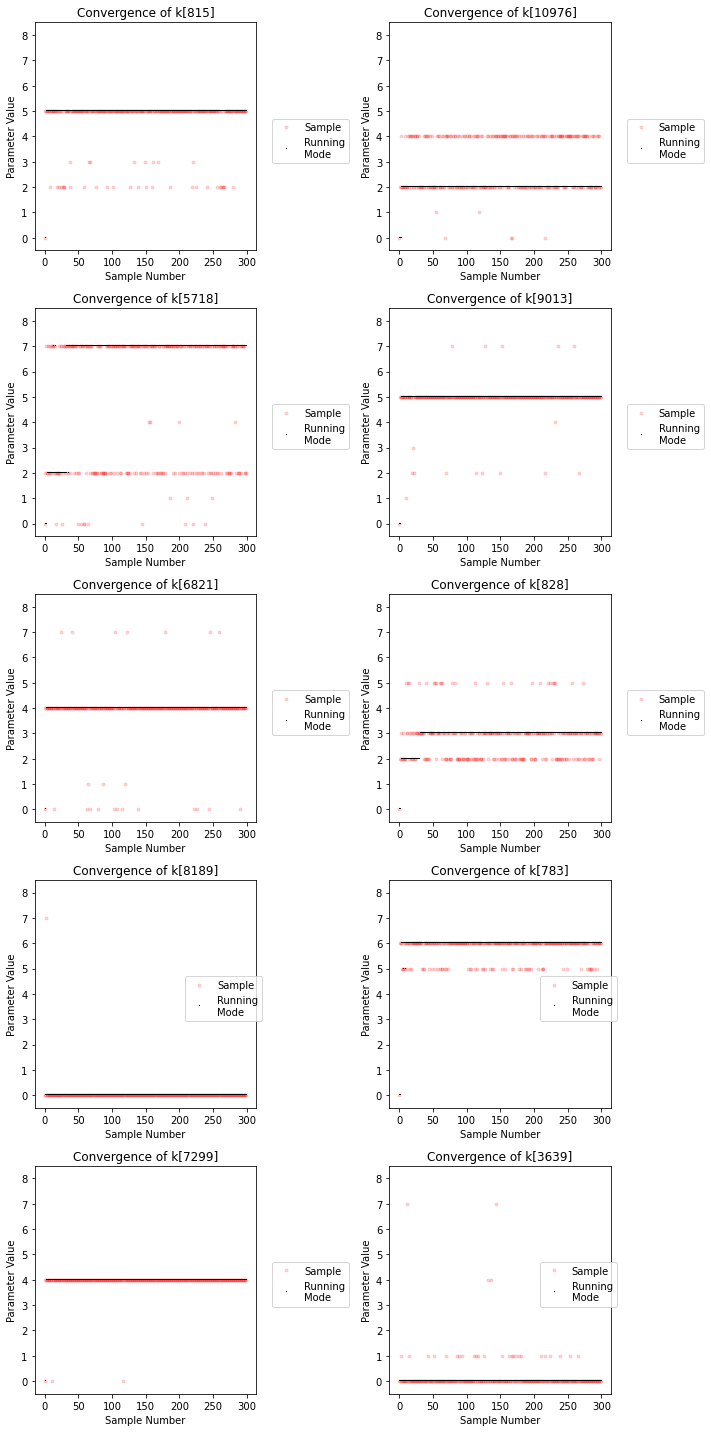

In [74]:
samples_class_assignments = model.samples_class_assignments
print(samples_class_assignments.shape)

# Get random indexes
i_range = np.random.choice(np.arange(0,samples_class_assignments.shape[1]),number_of_cols*number_of_rows)

plt.figure(figsize=(10,20))
num_plot = 1
for i in i_range:
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(0,samples_class_assignments.shape[0]):
        running_avg[num_sample] = mode(samples_class_assignments[:num_sample+1, i])[0][0].astype(int)
        
    plt.subplot(number_of_rows,number_of_cols,num_plot,alpha=.5)
    # Plot samples
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "k,", label="Running\nMode")
    
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(-.5,num_classes+.5)
    num_plot += 1
plt.tight_layout()

### pi

(300, 8)


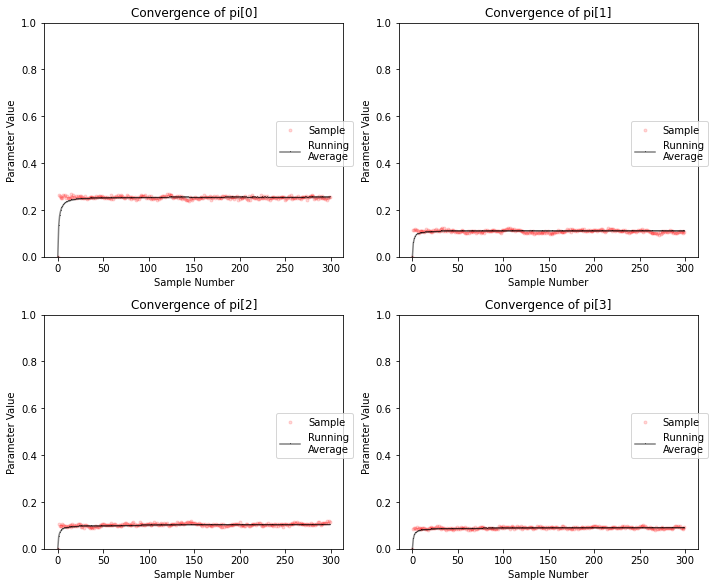

In [54]:
samples_class_probabilities = model.samples_class_probabilities
print(samples_class_probabilities.shape)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(0,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample+1, c])

    plt.subplot(number_of_rows,number_of_cols,num_plot)
    # Plot samples
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
    
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(0,1)
    num_plot += 1
plt.tight_layout()

## Test Scores
The test provides a way to convert your answers to an overall score

In [55]:
# The questions where answering B is considered narcissistic
qb_narcissistic = np.array([4, 5, 7, 9, 10, 15, 17, 18, 19, 20, 22, 23, 26, 28, 32, 35,40],dtype=int)-1

# x np.array : (num_samples,40)
#   x[i,j] denotes the probability of person i answering B for question j
def expected_npi_score(x):
    if len(x.shape) == 1:
        x = np.array([x])
    score = np.sum(x.take(qb_narcissistic,axis=1),axis=1)
    return score + np.sum(np.delete(1-x, qb_narcissistic,axis=1),axis=1)

### Distribution of test scores of the data

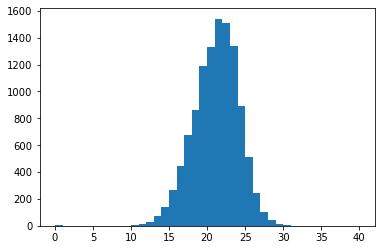

In [56]:
data_scores = expected_npi_score(df.to_numpy())
plt.hist(data_scores,bins = 40)
pass

### Avg test score of each cluster

In [57]:
theta.insert(loc=0,
             column="Test Scores",
             value=expected_npi_score(theta.to_numpy()))
display(theta)

ValueError: cannot insert Test Scores, already exists

## Monte Carlo Simulations

In [ ]:
num_simulations = 2 # Recommended 100
mc_samples_theta = np.zeros((num_simulations,num_classes,df.shape[1]))
mc_samples_pi = np.zeros((num_simulations,num_classes))
mc_samples_k = np.zeros((num_simulations,df.shape[0]),dtype=int)
mc_samples_true_k = np.zeros((num_simulations,df.shape[0]),dtype=int)
mc_samples_times = np.zeros((num_simulations))
mc_samples_ar_scores = np.zeros((num_simulations))

# todo find the bias, and root mean square error

for num_sim in range(num_simulations):
    # Sample new data
    mc_data, mc_k = model.resample()
    
    # Set up model
    model_mc = MixtureModelBernoulli(num_classes=num_classes,
                                   random_state=random_state,
                                   burn_in=burn_in,
                                   max_iter=max_iter)

    # fit the data to the model
    print(f"\nRunning simulation {num_sim+1}/{num_simulations}...",end="")
    start_time = time.time()
    model_mc.fit(mc_data)
    total_time = time.time() - start_time
    print("DONE!")
    print(f"Total time: {convert_time_to_string(total_time)} (secs)")
    theta_temp, pi_temp, k_temp = model_mc.get_params()
    
    # Find Freq table for reindexing
    freq_table = pd.DataFrame()
    freq_table["True Class"] = model.mean_class_assignments
    freq_table["Pred Class"] = k_temp
    freq_table["Ones"] = 1
    # To make sure each class is covered
    freq_table.loc[len(freq_table)] = [0,0,0]
    freq_table.loc[len(freq_table)] = [1,1,0]
    freq_table.loc[len(freq_table)] = [3,2,0]
    freq_table.loc[len(freq_table)] = [3,3,0]
    freq_table = freq_table.pivot_table(columns="Pred Class",
                                        index="True Class",
                                        values="Ones",
                                        aggfunc=sum)
    freq_table = freq_table.fillna(0)
    
    # Reindex
    mapping = np.argmax(freq_table.to_numpy(), axis=0)
    mapping_inv = np.argmax(freq_table.to_numpy(), axis=1)
    k_temp = mapping[k_temp]
    pi_temp = pi_temp[mapping_inv]
    theta_temp = theta_temp[mapping_inv]
    
    # Append
    mc_samples_theta[num_sim] = theta_temp
    mc_samples_pi[num_sim] = pi_temp
    mc_samples_k[num_sim] = k_temp
    mc_samples_true_k[num_sim] = mc_k
    mc_samples_times[num_sim] = total_time
    mc_samples_ar_scores[num_sim] = adjusted_rand_score(k_temp,model.mean_class_assignments)
print("----------------------")
print("DONE!!!")
print(f"Ran {num_simulations} Simulations in {round(np.sum(mc_samples_times),3)} total secs ")
print(f"Average: {np.sum(mc_samples_times)/num_simulations:.4f} (secs) ")

### K-vectors of MC samples

In [ ]:
df_k_vecs = pd.DataFrame(mc_samples_k)
df_k_vecs.loc["True"] = model.mean_class_assignments
df_k_vecs

In [ ]:
fig = plt.figure()
plt.hist(mc_samples_ar_scores)
plt.show()

### Bias

In [ ]:
bias_theta = np.average(mc_samples_theta,axis=0) - model.mean_theta_params
bias_pi = np.average(mc_samples_pi,axis=0) - model.mean_class_probabilities

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(bias_theta)
plt.title("Bias Theta")
fig.colorbar(cax)    
    
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(bias_pi[:,np.newaxis])
plt.title("Bias Pi")
fig.colorbar(cax)

### MSE

In [ ]:
MSE_theta = bias_theta**2 * num_simulations
MSE_pi = bias_pi**2 * num_simulations

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(MSE_theta)
plt.title("MSE Theta")
fig.colorbar(cax)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(MSE_pi[:,np.newaxis])
plt.title("MSE Pi")
fig.colorbar(cax)